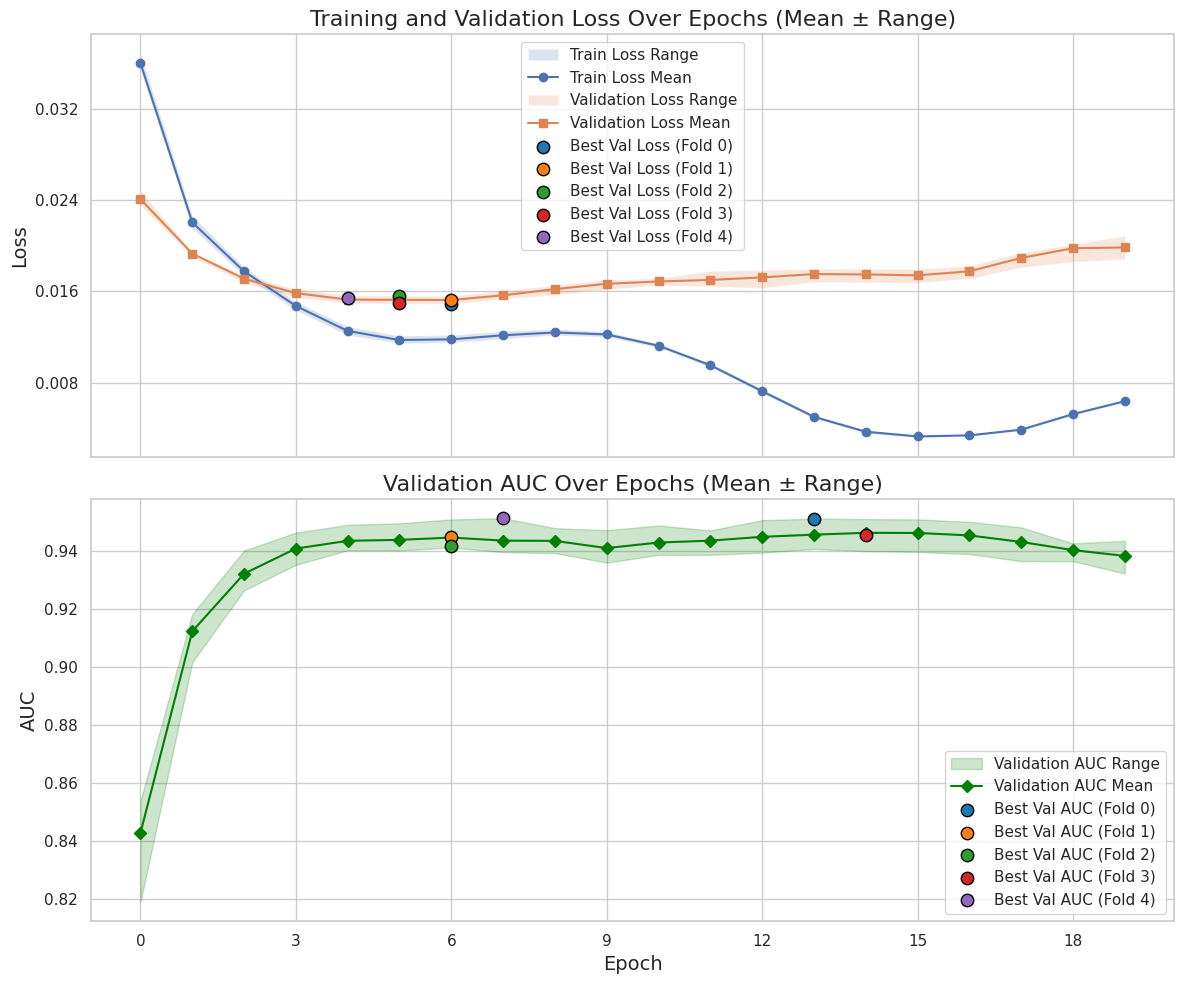

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Load the data
file_path = '/home/cele/다운로드/val_loss_log_concat.npy'
data = np.load(file_path)

# Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # skip header row

# Pre-process fold and epoch as float first, then cast to int where needed
df['fold'] = df['fold'].astype(float).astype(int)
df['epoch'] = df['epoch'].astype(float)
df['train_loss'] = df['train_loss'].astype(float)
df['train_auc'] = df['train_auc'].astype(float)
df['val_loss'] = df['val_loss'].astype(float)
df['val_auc'] = df['val_auc'].astype(float)

# Set style
sns.set(style="whitegrid")

# Aggregate min/max and mean per epoch
summary = df.groupby('epoch').agg({
    'train_loss': ['min', 'max', 'mean'],
    'val_loss': ['min', 'max', 'mean'],
    'val_auc': ['min', 'max', 'mean']
}).reset_index()
summary.columns = ['epoch', 'train_loss_min', 'train_loss_max', 'train_loss_mean',
                   'val_loss_min', 'val_loss_max', 'val_loss_mean',
                   'val_auc_min', 'val_auc_max', 'val_auc_mean']

# Find best val_loss and val_auc per fold
best_points = df.groupby('fold').agg({
    'val_loss': 'min',
    'val_auc': 'max'
}).reset_index()
best_loss_epochs = df.loc[df.groupby('fold')['val_loss'].idxmin()][['fold', 'epoch', 'val_loss']]
best_auc_epochs = df.loc[df.groupby('fold')['val_auc'].idxmax()][['fold', 'epoch', 'val_auc']]

# Set a color palette for folds
fold_palette = sns.color_palette("tab10", n_colors=df['fold'].nunique())
fold_color_map = {fold: fold_palette[i] for i, fold in enumerate(sorted(df['fold'].unique()))}

# Plot with range shading
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Train and Val Loss Range Plot
axs[0].fill_between(summary['epoch'], summary['train_loss_min'], summary['train_loss_max'], alpha=0.2, label='Train Loss Range', zorder=1)
axs[0].plot(summary['epoch'], summary['train_loss_mean'], marker='o', label='Train Loss Mean', zorder=2)
axs[0].fill_between(summary['epoch'], summary['val_loss_min'], summary['val_loss_max'], alpha=0.2, label='Validation Loss Range', zorder=1)
axs[0].plot(summary['epoch'], summary['val_loss_mean'], marker='s', label='Validation Loss Mean', zorder=2)

# Highlight best val_loss per fold with unique colors
for idx, row in best_loss_epochs.iterrows():
    fold = int(row['fold'])
    axs[0].scatter(row['epoch'], row['val_loss'], color=fold_color_map[fold], s=80, edgecolor='black', label=f"Best Val Loss (Fold {fold})", zorder=3)

axs[0].set_title('Training and Validation Loss Over Epochs (Mean ± Range)', fontsize=16)
axs[0].set_ylabel('Loss', fontsize=14)
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0].legend()

# Validation AUC Range Plot
axs[1].fill_between(summary['epoch'], summary['val_auc_min'], summary['val_auc_max'], alpha=0.2, color='green', label='Validation AUC Range', zorder=1)
axs[1].plot(summary['epoch'], summary['val_auc_mean'], marker='D', color='green', label='Validation AUC Mean', zorder=2)

# Highlight best val_auc per fold with unique colors
for idx, row in best_auc_epochs.iterrows():
    fold = int(row['fold'])
    axs[1].scatter(row['epoch'], row['val_auc'], color=fold_color_map[fold], s=80, edgecolor='black', label=f"Best Val AUC (Fold {fold})", zorder=3)

axs[1].set_title('Validation AUC Over Epochs (Mean ± Range)', fontsize=16)
axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('AUC', fontsize=14)
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].legend()

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
v0 = np.load('/home/cele/다운로드/val_loss_log_concat.npy')
v1 = np.load('/home/cele/다운로드/val_loss_log.npy')

vf = np.concatenate([v0, v1])
np.save('val_loss_log_concat.npy', vf)